In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Susy Dataset

In [2]:
df = pd.read_csv("../train.csv", index_col=0)
df.head()

df_test = pd.read_csv("../test.csv", index_col=0)
columns = ['class'] + list(df.columns)[:-1]
df_full = pd.read_csv("./SUSY.csv", names=columns)
df_full = df_full[list(df.columns)]

df_full['JOIN'] = df_full['lepton_1_pT'].astype('str').apply(lambda x: x[:7]) + \
                    df_full['lepton_1_eta'].astype('str').apply(lambda x: x[:7]) + \
                        df_full['lepton_1_phi'].astype('str').apply(lambda x: x[:7])

df_test['JOIN'] = df_test['lepton_1_pT'].astype('str').apply(lambda x: x[:7]) + \
                    df_test['lepton_1_eta'].astype('str').apply(lambda x: x[:7]) + \
                        df_test['lepton_1_phi'].astype('str').apply(lambda x: x[:7])

df_all = df_full.merge(df_test, on=['JOIN'], how='left', indicator=True)

df_test = df_full.iloc[(df_all[df_all['_merge'] == 'both']).index].drop('JOIN', axis=1)

In [3]:
df_test.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584,1.0
12,0.698336,1.689431,-1.134670,0.966594,1.503367,0.880949,0.242573,-0.228654,0.364132,0.109350,0.668554,0.489941,0.650313,0.683634,0.664825,0.510385,0.584092,0.031694,0.0
13,0.578286,-0.689652,-0.390094,0.480061,-0.632219,1.212005,0.640473,-1.622401,0.872160,-0.186169,0.451853,0.669288,1.314412,0.559444,0.491753,0.559017,1.286520,0.400292,0.0
14,0.798202,0.099358,-1.095839,0.531147,-0.962327,1.500362,1.273941,0.675408,1.803743,-0.845941,0.685836,1.234757,1.597630,1.864630,0.775854,1.556949,1.245781,0.538010,1.0
22,1.466649,0.115517,-1.036161,0.877247,0.690861,1.130069,0.890722,0.426515,1.283212,-0.563880,1.090046,1.327570,1.080762,1.588076,1.069615,1.258800,0.443045,0.415406,0.0


In [4]:
df_hc = pd.read_csv('../train.csv', index_col=0)
df_hc.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [5]:
df_hcc = df_hc.copy()

# Preprocessing

In [6]:
df_hcc.columns

Index(['lepton_1_pT', 'lepton_1_eta', 'lepton_1_phi', 'lepton_2_pT',
       'lepton_2_eta', 'lepton_2_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R',
       'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)', 'class'],
      dtype='object')

(array([1.920925e+06, 1.137938e+06, 3.958780e+05, 4.400300e+04,
        1.041000e+03, 9.900000e+01, 5.500000e+01, 3.200000e+01,
        1.100000e+01, 8.000000e+00, 4.000000e+00, 2.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00]),
 array([ 0.        ,  1.03431225,  2.0686245 ,  3.10293674,  4.13724899,
         5.17156124,  6.20587349,  7.24018574,  8.27449799,  9.30881023,
        10.34312248, 11.37743473, 12.41174698, 13.44605923, 14.48037148,
        15.51468372, 16.54899597, 17.58330822, 18.61762047, 19.65193272,
        20.68624496]),
 <BarContainer object of 20 artists>)

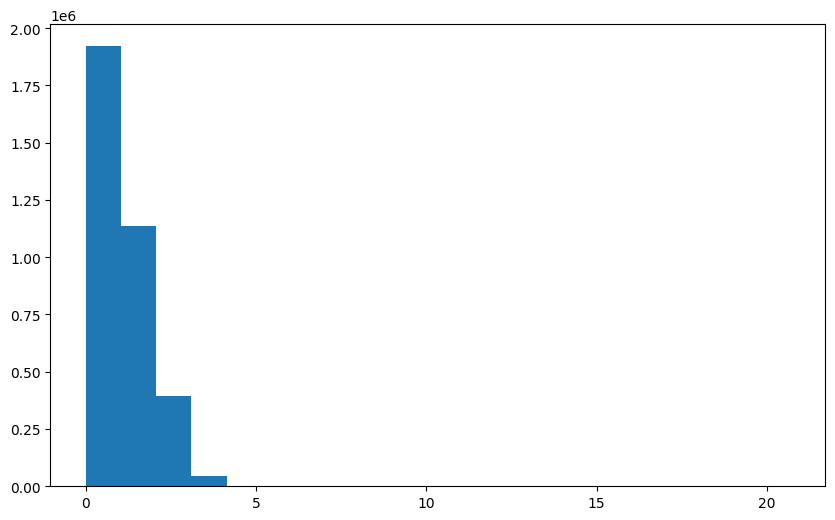

In [8]:
(df_hcc.iloc[:,13] ==0).sum()
plt.figure(figsize=(10,6))
plt.hist((df_hcc.iloc[:,13]), bins=20)

In [9]:
df_hcc.head()

,lepton_1_pT,lepton_1_eta,lepton_1_phi,lepton_2_pT,lepton_2_eta,lepton_2_phi,missing_energy_magnitude,missing_energy_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1),class
0,0.841381,1.832647,-0.689286,0.781839,0.572864,1.577097,0.398978,-0.683847,0.001826,0.651397,0.865560,0.429017,0.439840,0.000000,0.796105,0.342497,0.461542,0.005710,0.0
1,0.663798,2.058290,0.681435,1.054036,0.575352,-1.001445,0.462154,-0.833411,0.199734,0.215158,0.949988,0.618046,0.577324,0.000000,0.962927,0.333800,1.455247,0.101246,0.0
2,1.792225,-1.099978,0.088109,0.573157,-0.472629,1.642084,1.203374,1.506731,0.457695,-0.640507,1.157024,1.585432,1.215963,0.000000,1.113292,0.645729,0.721326,0.613326,1.0
3,0.893018,0.297782,-1.274870,1.316164,1.593303,0.672115,0.307014,-1.189868,0.064561,0.430909,1.162625,0.548821,0.418897,0.163908,1.157707,0.298163,0.803802,0.038902,0.0
4,1.338997,0.350023,-1.518510,1.482963,-0.491807,0.340170,0.415071,-1.292034,0.240712,0.611775,1.307798,0.697804,0.473487,0.429977,1.287935,0.330327,0.717237,0.003147,1.0


In [10]:
# df_hcc = pd.concat([df_hcc, df_hcc.iloc[:,[11,12,14,15]].apply(lambda x:np.log(x)).add_suffix('_transformed')], axis=1)
# df_hcc = pd.concat([df_hcc, df_hcc.iloc[:,[13]].apply(lambda x:np.sqrt(x)).add_suffix('_transformed')], axis=1)

# df_hcc.iloc[:,[0,3,6,8,10,11,12,14,15]] = df_hcc.iloc[:,[0,3,6,8,10,11,12,14,15]].apply(lambda x:np.log(x))
# df_hcc.iloc[:,[4,9]] = df_hcc.iloc[:,[4,9]].apply(lambda x:np.log(x**2))
# df_hcc.iloc[:,[13,17]] = df_hcc.iloc[:,[13,17]].apply(lambda x:np.sqrt(x))

df_hcc.iloc[:,[11,12,14,15]] = df_hcc.iloc[:,[11,12,14,15]].apply(lambda x:np.log(x))
df_hcc.iloc[:,[13]] = df_hcc.iloc[:,[13]].apply(lambda x:np.sqrt(x))

<AxesSubplot:>

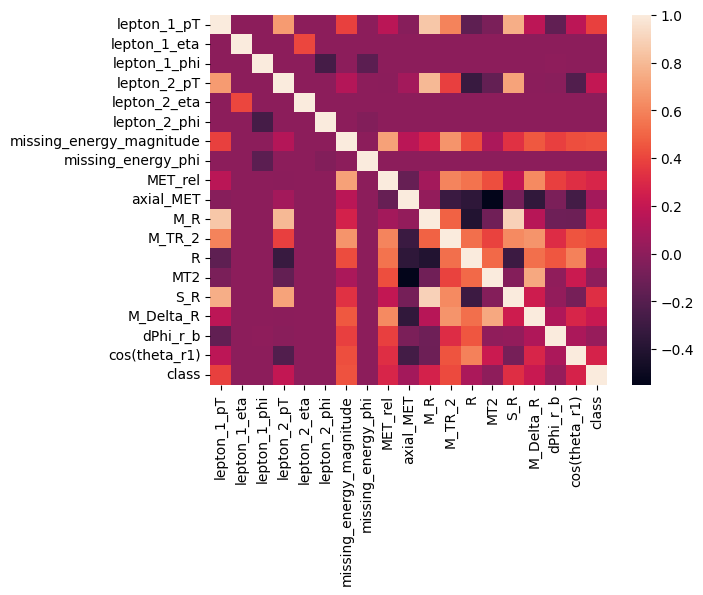

In [11]:
sns.heatmap(df_hcc.corr())

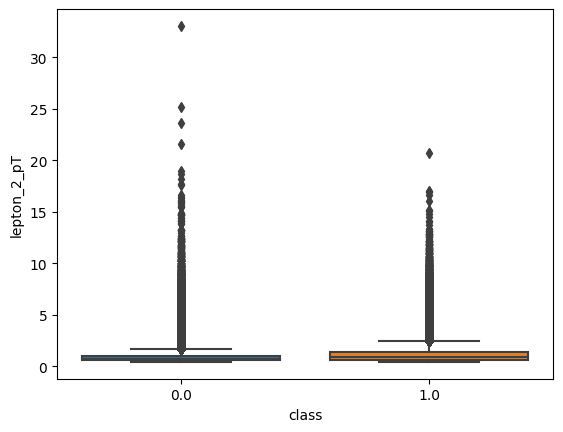

In [12]:
sns.boxplot(data=df_hcc, y='lepton_2_pT', x='class')
df_hcc=df_hcc[df_hcc['lepton_1_pT'] < 5]

In [13]:
df_hcc.shape

(3491438, 19)

In [14]:
df_hcc = df_hcc.drop(columns =['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi'], axis=1)

# Split for Calculation

In [15]:
# For imputation
# df_hcc.iloc[:,13] = df_hcc.iloc[:,13].apply(lambda x:None if x==0 else x)

In [16]:
X = df_hcc.loc[:,df_hcc.columns != 'class'].to_numpy(dtype=np.float_)
y = df_hcc['class'].to_numpy(dtype=np.float_)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# imputer_train_test = IterativeImputer()
# X_train = imputer_train_test.fit_transform(X_train)
# X_test = imputer_train_test.transform(X_test)

# imputer_full = IterativeImputer()
# X = imputer_full.fit_transform(X)

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_train_test = StandardScaler()
X_train = scaler_train_test.fit_transform(X_train)
X_test = scaler_train_test.transform(X_test)

scaler_full = StandardScaler()
X = scaler_full.fit_transform(X)

# Model Training

#### Random Forest Model

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
model_rf = RandomForestClassifier(n_estimators=170, n_jobs=-1)
model_rf.fit(X_train ,y_train)
model_rf.feature_importances_
model_rf.score(X_test, y_test)

0.8002692857142857

In [160]:
model_rf.fit(X, y)

RandomForestClassifier(n_estimators=170, n_jobs=-1)

In [161]:
model_rf.feature_importances_

array([0.1064084 , 0.04511328, 0.03257949, 0.03740543, 0.04619206,
       0.03243914, 0.14630093, 0.03257975, 0.04986304, 0.08659996,
       0.05231644, 0.09358699, 0.03508649, 0.03240472, 0.04388836,
       0.04028034, 0.0423919 , 0.04456327])

In [162]:
df_test_2 = df_test.copy()
df_test_2.iloc[:,[0,3,6,8,10,11,12,14,15]] = df_test_2.iloc[:,[0,3,6,8,10,11,12,14,15]].apply(lambda x:np.log(x))
df_test_2.iloc[:,[4,9]] = df_test_2.iloc[:,[4,9]].apply(lambda x:np.log(x**2))
df_test_2.iloc[:,17] = df_test_2.iloc[:,17].apply(lambda x:np.sqrt(x))
X_tl, y_tl = scaler_full.transform(df_test_2.loc[:,~df_test_2.columns.isin(['class'])]), df_test_2['class']
model_rf.score(X_tl, y_tl)

C:\Users\kishl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.8012706666666667

#### Gradient Boost Model

In [202]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_xg = HistGradientBoostingClassifier(l2_regularization=2, max_leaf_nodes=150, random_state=42)
model_xg.fit(X_train, y_train)
model_xg.score(X_test, y_test)

0.8025103568116311

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': (0.01, 0.1),
    'random_state': [42],
    'max_leaf_nodes': (200, 250, 300),
    'l2_regularization': (0.3, 0.4, 0.5)}

model_grid_search = GridSearchCV(HistGradientBoostingClassifier(), param_grid=param_grid,
                                 n_jobs=-1, cv=5, verbose=2)
model_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'l2_regularization': (0.3, 0.4, 0.5),
                         'learning_rate': (0.01, 0.1),
                         'max_leaf_nodes': (200, 250, 300),
                         'random_state': [42]},
             verbose=2)

In [14]:
print(model_grid_search.best_params_)
print(model_grid_search.best_estimator_)
model_grid_search.score(X_test, y_test)

{'l2_regularization': 0.5, 'learning_rate': 0.1, 'max_leaf_nodes': 250, 'random_state': 42}
HistGradientBoostingClassifier(l2_regularization=0.5, max_leaf_nodes=250,
                               random_state=42)


0.8031893717205508

In [179]:
# model_xg = HistGradientBoostingClassifier(l2_regularization=model_grid_search.best_params_['l2_regularization'],
#                                 learning_rate=model_grid_search.best_params_['learning_rate'],
#                                 max_leaf_nodes=model_grid_search.best_params_['max_leaf_nodes'], random_state=42)

model_xg = HistGradientBoostingClassifier(l2_regularization=2, max_leaf_nodes=1000, max_iter=1000, learning_rate=0.01, random_state=42)
model_xg.fit(X_train, y_train)
model_xg.score(X_test, y_test)

0.803453589349953

In [22]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_xg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=df_hcc.columns[sorted_importances_idx],
)
importances

,lepton_2_pT,M_TR_2,R,M_R,cos(theta_r1),lepton_2_eta,MT2,dPhi_r_b,lepton_1_eta,M_Delta_R,S_R,MET_rel,axial_MET,lepton_1_pT,missing_energy_magnitude
0,0.001254,0.001351,0.002318,0.004133,0.005801,0.007325,0.008760,0.009116,0.010937,0.014827,0.015697,0.017563,0.037239,0.088037,0.162172
1,0.001204,0.001230,0.002392,0.004290,0.005841,0.007397,0.009052,0.009218,0.010705,0.015309,0.015445,0.017603,0.036932,0.088431,0.162062
2,0.001184,0.001234,0.002221,0.004071,0.005748,0.007490,0.008768,0.009176,0.010873,0.014705,0.015363,0.017716,0.037104,0.088156,0.161315
3,0.001133,0.001347,0.002353,0.004077,0.005737,0.007606,0.008775,0.009208,0.011038,0.014995,0.015393,0.017456,0.036897,0.087870,0.161632
4,0.001312,0.001246,0.002287,0.004442,0.005854,0.007611,0.008837,0.009286,0.010756,0.014949,0.015216,0.017489,0.037242,0.088357,0.161945
5,0.001195,0.001244,0.002268,0.004361,0.005854,0.007657,0.008678,0.009177,0.010814,0.014708,0.015441,0.017500,0.037104,0.087589,0.161638
6,0.001141,0.001311,0.002275,0.004268,0.005488,0.007424,0.008777,0.009219,0.010922,0.015057,0.015332,0.017672,0.036817,0.088171,0.161465
7,0.001174,0.001373,0.002250,0.004077,0.005866,0.007581,0.008815,0.009225,0.010956,0.014904,0.015433,0.017790,0.037149,0.088127,0.161732
8,0.001354,0.001174,0.002288,0.004495,0.005697,0.007468,0.008780,0.009197,0.011095,0.015042,0.015211,0.017680,0.037185,0.087851,0.161547
9,0.001277,0.001232,0.002331,0.004291,0.005927,0.007344,0.008707,0.009142,0.010890,0.015176,0.015295,0.017688,0.037007,0.087967,0.162112


In [180]:
# model_xg = HistGradientBoostingClassifier(l2_regularization=model_grid_search.best_params_['l2_regularization'],
#                                 learning_rate=model_grid_search.best_params_['learning_rate'],
#                                 max_leaf_nodes=model_grid_search.best_params_['max_leaf_nodes'], random_state=42)

model_xg = HistGradientBoostingClassifier(l2_regularization=2, max_leaf_nodes=1000, max_iter=1000, learning_rate=0.01, random_state=42)
model_xg.fit(X, y)
model_xg.score(X, y)

0.8119751804270905

In [183]:
# df_test_2 = df_test.copy()
# df_test_2.iloc[:,[0,3,6,8,10,11,12,14,15]] = df_test_2.iloc[:,[0,3,6,8,10,11,12,14,15]].apply(lambda x:np.log(x))
# df_test_2.iloc[:,[4,9]] = df_test_2.iloc[:,[4,9]].apply(lambda x:np.log(x**2))
# df_test_2.iloc[:,17] = df_test_2.iloc[:,17].apply(lambda x:np.sqrt(x))
X_tl, y_tl = scaler_full.transform(df_test.loc[:,~df_test.columns.isin(['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi', 'class'])]), df_test['class']
model_xg.score(X_tl, y_tl)

C:\Users\kishl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.8040586666666667

In [184]:
# X_t = pd.read_csv('../test.csv', index_col=0).to_numpy(dtype=np.float_)
X_t = pd.read_csv('../test.csv', index_col=0).drop(columns=['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi'], axis=1).to_numpy(dtype=np.float_)
X_t = scaler_full.transform(X_t)
# output_rf = pd.Series(model_rf.predict(X_t), name='class')
output_xg = pd.Series(model_xg.predict(X_t).astype(np.float_), name='class')
output_xg.to_csv('res_xg.csv', index=True, index_label='Id')

#### Adaboost Model

In [328]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=150, learning_rate=0.1)
model_ada.fit(X_train, y_train)
model_ada.score(X_test, y_test)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'n_jobs'

#### SVM

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
model_sgd = SGDClassifier(n_jobs=-1)
model_sgd.fit(X_train, y_train)

SGDClassifier(n_jobs=-1)

In [16]:
model_sgd.score(X_test, y_test)

0.7866854363815503

#### XGB

In [291]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [10,25,30],
           'learning_rate': [0.01],
           'subsample':[0.5],
           'colsample_bytree':[0.6],
           'colsample_bylevel': [0.6],
          'min_child_weight':[10],
         'gamma':[0.05],
          'tree_method':['gpu_hist'],
          'n_estimators': [300],
          'gpu_id':[0]
         }
model = GridSearchCV(XGBClassifier(), param_grid=params, cv=5, verbose=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: 

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier

model_xgb = XGBClassifier(max_depth=10,
           learning_rate=0.03,
           subsample=0.8,
           colsample_bytree=0.8,
          colsample_bylevel=0.8,
          min_child_weight=13,
         gamma=0.09,
         num_parallel_tree=4,
 objective='binary:logistic',
 # sampling_method='gradient_based',
         eval_metric='merror',
         tree_method='hist',
          n_estimators=1000,
          random_state=42, # gpu_id=0,
          n_jobs=-1
          )
model_xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='merror', feature_types=None, gamma=0.09, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.03, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=13, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=4, predictor='auto', random_state=42, ...)

In [28]:
df_test_2 = df_test.copy()

# df_test_2.iloc[:,[0,3,6,8,10,11,12,14,15]] = df_test_2.iloc[:,[0,3,6,8,10,11,12,14,15]].apply(lambda x:np.log(x))
# df_test_2.iloc[:,[4,9]] = df_test_2.iloc[:,[4,9]].apply(lambda x:np.log(x**2))
# df_test_2.iloc[:,[13,17]] = df_test_2.iloc[:,[13,17]].apply(lambda x:np.sqrt(x))

df_test_2.iloc[:,[11,12,14,15]] = df_test_2.iloc[:,[11,12,14,15]].apply(lambda x:np.log(x))
df_test_2.iloc[:,[13]] = df_test_2.iloc[:,[13]].apply(lambda x:np.sqrt(x))

df_test_2 = df_test_2.drop(['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi'], axis=1)
X_tl, y_tl = df_test_2.loc[:,~df_test_2.columns.isin(['class'])], df_test_2['class']

# X_tl = imputer_full.transform(X_tl)
X_tl = scaler_full.transform(X_tl)

model_xgb.score(X_tl, y_tl)

C:\Users\kishl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.8044473333333333

In [27]:
bad = (model_xgb.predict(X_tl)!=y_tl)
good = (model_xgb.predict(X_tl)==y_tl)

In [28]:
pd.DataFrame(model_xgb.predict_proba(X_tl[good])).describe()

,0,1
count,1.206725e+06,1.206725e+06
mean,5.329040e-01,4.670960e-01
std,3.541679e-01,3.541679e-01
min,3.218651e-06,8.266995e-03
25%,1.378038e-01,1.426999e-01
50%,6.718651e-01,3.281349e-01
75%,8.573000e-01,8.621962e-01
max,9.917330e-01,9.999968e-01


In [22]:
model_xgb.feature_importances_

array([0.16153808, 0.02685192, 0.00820947, 0.02046912, 0.35240406,
       0.02017223, 0.08709232, 0.04713774, 0.15880756, 0.01598843,
       0.01751463, 0.02074286, 0.01574262, 0.02321202, 0.02411691],
      dtype=float32)

In [45]:
X_t = pd.read_csv('../test.csv', index_col=0)

# X_t.iloc[:,[0,3,6,8,10,11,12,14,15]] = X_t.iloc[:,[0,3,6,8,10,11,12,14,15]].apply(lambda x:np.log(x))
# df_test_2.iloc[:,[4,9]] = df_test_2.iloc[:,[4,9]].apply(lambda x:np.log(x**2))
# X_t.iloc[:,[13,17]] = X_t.iloc[:,[13,17]].apply(lambda x:np.sqrt(x))

X_t.iloc[:,[11,12,14,15]] = X_t.iloc[:,[11,12,14,15]].apply(lambda x:np.log(x))
X_t.iloc[:,[13]] = X_t.iloc[:,[13]].apply(lambda x:np.sqrt(x))

X_t = X_t.drop(columns=['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi'], axis=1)
X_t = X_t.to_numpy(dtype=np.float_)

# X_t = imputer_full.transform(X_t)
X_t = scaler_full.transform(X_t)

output_xgb = pd.Series(model_xgb.predict(X_t).astype(np.float_), name='class')
output_xgb.to_csv('res_xgb.csv', index=True, index_label='Id')

#### VC

In [ ]:
from sklearn.ensemble import VotingClassifier

# Final Predictions 

In [68]:
X_t = pd.read_csv('../test.csv', index_col=0).to_numpy(dtype=np.float_)
# X_t = pd.read_csv('../test.csv', index_col=0).drop(columns=['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi'], axis=1).to_numpy(dtype=np.float_)
X_t = scaler_full.transform(X_t)
# output_rf = pd.Series(model_rf.predict(X_t), name='class')
output_xgb = pd.Series(model_xgb.predict(X_t).astype(np.float_), name='class')

In [69]:
# output_rf.to_csv('res_rf.csv', index=True, index_label='Id')
output_xgb.to_csv('res_xgb.csv', index=True, index_label='Id')

In [70]:
X_tl, y_tl = scaler_full.transform(df_test.loc[:,~df_test.columns.isin(['lepton_1_phi', 'missing_energy_phi', 'lepton_2_phi', 'class'])]), df_test['class']
model_xg.score(X_tl, y_tl)

C:\Users\kishl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 15 features, but StandardScaler is expecting 18 features as input.